<a href="https://colab.research.google.com/github/sravanthivalluru06/OIB-SIP/blob/main/Project_1_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

sns.set(style="whitegrid")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [ ]:
import pandas as pd

retail_df = pd.read_csv('retail_sales_dataset.csv')
retail_df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
retail_df.drop_duplicates(inplace=True)
retail_df.dropna(inplace=True)
retail_df.columns = retail_df.columns.str.lower().str.replace(" ", "_")


In [ ]:
import pandas as pd

retail_df = pd.read_csv('retail_sales_dataset.csv')

print(retail_df.head())

print("Available columns:", retail_df.columns.tolist())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Available columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [ ]:
retail_df.columns = retail_df.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
retail_df['total_amount'].mean()


np.float64(456.0)

In [ ]:
retail_df['total_amount'].median()

135.0

In [ ]:
retail_df['total_amount'].mode()

,total_amount
0,50


In [ ]:
retail_df['total_amount'].std()

559.997631555123

Available columns after cleaning: ['transaction_id', 'date', 'customer_id', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount']


/tmp/ipython-input-2920268559.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = retail_df[expected_sales_col].resample('M').sum()


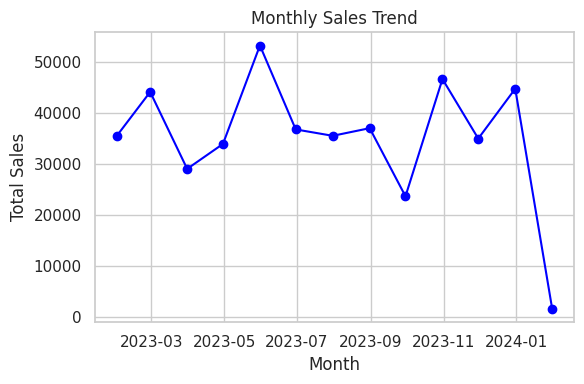

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

retail_df = pd.read_csv('retail_sales_dataset.csv')

retail_df.columns = retail_df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Available columns after cleaning:", retail_df.columns.tolist())

expected_date_col = 'date'
expected_sales_col = 'total_amount'

if expected_date_col not in retail_df.columns or expected_sales_col not in retail_df.columns:
    raise KeyError(f"Missing required columns. Found columns: {retail_df.columns.tolist()}")

retail_df[expected_date_col] = pd.to_datetime(retail_df[expected_date_col], errors='coerce')

retail_df = retail_df.dropna(subset=[expected_date_col])

retail_df[expected_sales_col] = pd.to_numeric(retail_df[expected_sales_col], errors='coerce')

retail_df = retail_df.dropna(subset=[expected_sales_col])

retail_df = retail_df.set_index(expected_date_col)

monthly_sales = retail_df[expected_sales_col].resample('M').sum()

plt.figure(figsize=(6, 4))
plt.plot(monthly_sales, marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
retail_df = pd.read_csv('retail_sales_dataset.csv')

retail_df.columns = retail_df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Available columns after cleaning:", retail_df.columns.tolist())

top_customers = retail_df.groupby('customer_id')['total_amount'].sum().nlargest(10)
print("Top 10 Customers:")
print(top_customers)

top_products = retail_df.groupby('product_category')['total_amount'].sum().nlargest(10)
print("\nTop 10 Products:")
print(top_products)



Available columns after cleaning: ['transaction_id', 'date', 'customer_id', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount']
Top 10 Customers:
customer_id
CUST015    2000
CUST065    2000
CUST072    2000
CUST074    2000
CUST089    2000
CUST093    2000
CUST109    2000
CUST118    2000
CUST124    2000
CUST139    2000
Name: total_amount, dtype: int64

Top 10 Products:
product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64


Column Names: ['transaction_id', 'date', 'customer_id', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount']


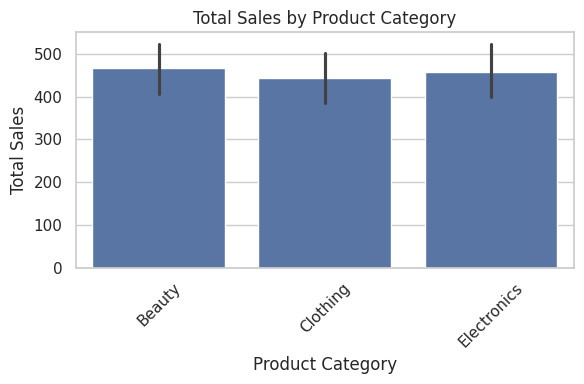

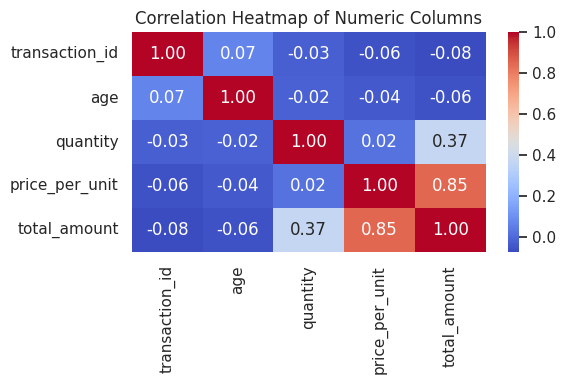

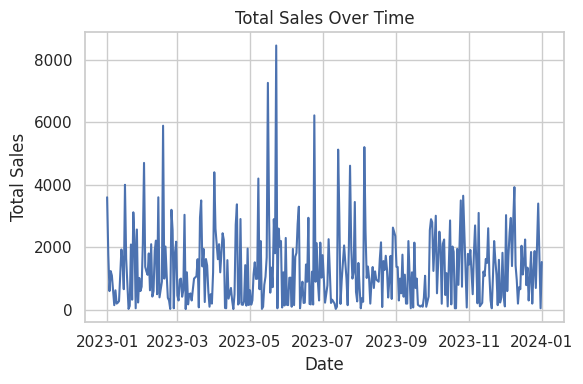

In [ ]:
retail_df = pd.read_csv('retail_sales_dataset.csv')

retail_df.columns = retail_df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Column Names:", retail_df.columns.tolist())

plt.figure(figsize=(6, 4))
sns.barplot(
    data=retail_df,
    x='product_category',
    y='total_amount'
)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
corr_matrix = retail_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Columns")
plt.tight_layout()
plt.show()

if 'date' in retail_df.columns:
    retail_df['date'] = pd.to_datetime(retail_df['date'])

    sales_over_time = retail_df.groupby('date')['total_amount'].sum().reset_index()

    plt.figure(figsize=(6, 4))
    sns.lineplot(
        data=sales_over_time,
        x='date',
        y='total_amount'
    )
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.title("Total Sales Over Time")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'date' not found in the dataset. Cannot create line graph.")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving menu.csv to menu.csv


In [ ]:
import pandas as pd

retail_df = pd.read_csv('menu.csv')
retail_df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
import pandas as pd

menu_df = pd.read_csv('menu.csv')

print(menu_df.head())

print("Available columns:", menu_df.columns.tolist())


    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [ ]:
menu_df['Calories'].mean()


np.float64(368.2692307692308)

In [ ]:
menu_df['Calories'].median()

340.0

In [ ]:
menu_df['Calories'].mode()

,Calories
0,0


In [ ]:
menu_df['Calories'].std()

240.26988649145852

In [ ]:
menu_df = pd.read_csv('menu.csv')

menu_df.columns = menu_df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Available columns after cleaning:", menu_df.columns.tolist())

top_items = menu_df.groupby('item')['calories'].sum().nlargest(10)
print("Top 10 Items and their Calorie Content:")
print(top_items)



Available columns after cleaning: ['category', 'item', 'serving_size', 'calories', 'calories_from_fat', 'total_fat', 'total_fat_(%_daily_value)', 'saturated_fat', 'saturated_fat_(%_daily_value)', 'trans_fat', 'cholesterol', 'cholesterol_(%_daily_value)', 'sodium', 'sodium_(%_daily_value)', 'carbohydrates', 'carbohydrates_(%_daily_value)', 'dietary_fiber', 'dietary_fiber_(%_daily_value)', 'sugars', 'protein', 'vitamin_a_(%_daily_value)', 'vitamin_c_(%_daily_value)', 'calcium_(%_daily_value)', 'iron_(%_daily_value)']
Top 10 Items and their Calorie Content:
item
Chicken McNuggets (40 piece)                                    1880
Big Breakfast with Hotcakes (Large Biscuit)                     1150
Big Breakfast with Hotcakes (Regular Biscuit)                   1090
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)      1050
Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)     990
Chicken McNuggets (20 piece)                                     940
McFlurry with M&M’s 

/tmp/ipython-input-230414323.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


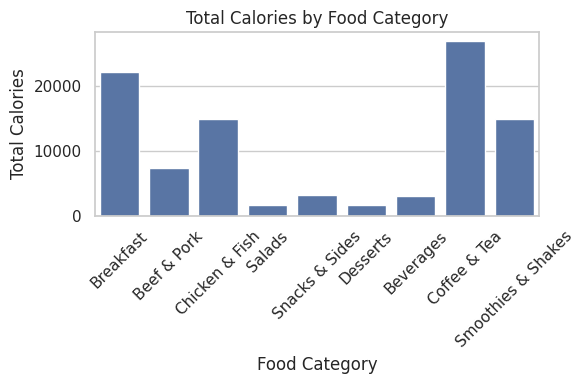

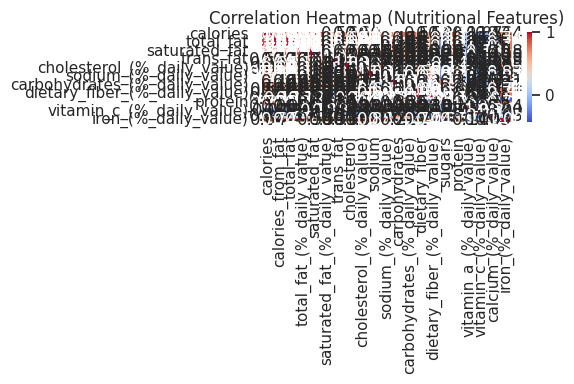

No 'date' column found. Skipping monthly calorie trend line chart.


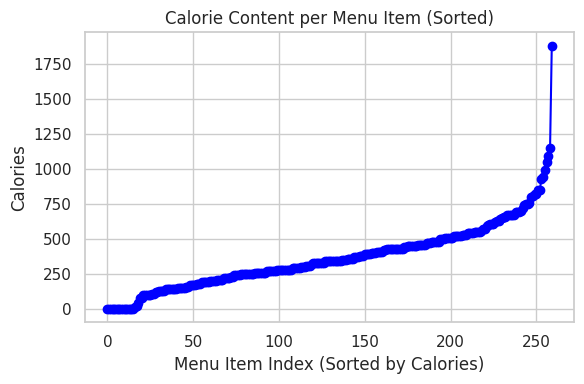

In [ ]:
menu_df.columns = menu_df.columns.str.strip().str.lower().str.replace(' ', '_')

menu_df.drop_duplicates(inplace=True)
menu_df.dropna(inplace=True)

if 'category' in menu_df.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(
        data=menu_df,
        x='category',
        y='calories',
        estimator=sum,
        ci=None
    )
    plt.title("Total Calories by Food Category")
    plt.xlabel("Food Category")
    plt.ylabel("Total Calories")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'category' column found. Skipping bar plot.")

plt.figure(figsize=(6, 4))
sns.heatmap(
    menu_df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap (Nutritional Features)")
plt.tight_layout()
plt.show()

if 'date' in menu_df.columns:
    menu_df['date'] = pd.to_datetime(menu_df['date'], errors='coerce')
    menu_df = menu_df.dropna(subset=['date'])

    monthly_calories = menu_df.set_index('date')['calories'].resample('M').sum()

    plt.figure(figsize=(6, 4))
    plt.plot(monthly_calories.index, monthly_calories.values, marker='o', linestyle='-', color='green')
    plt.title("Monthly Calorie Trend (Line Chart)")
    plt.xlabel("Month")
    plt.ylabel("Total Calories")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'date' column found. Skipping monthly calorie trend line chart.")

sorted_menu = menu_df.sort_values(by='calories').reset_index()

plt.figure(figsize=(6, 4))
plt.plot(sorted_menu.index, sorted_menu['calories'], marker='o', linestyle='-', color='blue')
plt.title("Calorie Content per Menu Item (Sorted)")
plt.xlabel("Menu Item Index (Sorted by Calories)")
plt.ylabel("Calories")
plt.grid(True)
plt.tight_layout()
plt.show()
